In [24]:
# импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc as auc_metric

In [4]:
# Загрузим учебный датасет
df = pd.read_csv('S05-hw-dataset.csv')
df.head() # первые строки датасета

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
df.info() # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [6]:
df.describe() # описание числовых стаков

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [7]:
df.value_counts(normalize=True) # Распределение целого признака

client_id  age  income  years_employed  credit_score  debt_to_income  num_credit_cards  num_late_payments  has_mortgage  has_car_loan  savings_balance  checking_balance  region_risk_score  phone_calls_to_support_last_3m  active_loans  customer_tenure_years  default
3000       53   75302   13              692           0.093865        2                 7                  0             0             29853             1259             0.693861           6                               2             9                      0          0.000333
1          25   94074   22              839           0.547339        1                 7                  0             0             26057             5229             0.080052           19                              1             8                      0          0.000333
2          58   51884   26              565           0.290882        1                 1                  0             1             16221             11595            0.428311

In [8]:
df["default"].value_counts()

default
0    1769
1    1231
Name: count, dtype: int64

- В датасете 3000 объектов и 1769 признаков;
- Пропусков в столбцах не обнаружено
- Классы сбалансированы примерное чоотношение (0,5897 к 0,4103) = 58,97:41,03

In [9]:
# Выделим матрицу признаков X и вектор таргета y
df = df.drop(columns=['client_id']) # Удалим идентификатор
tar_col = "default"

X = df.drop(columns=[tar_col])
y=df[tar_col]
X.shape, y.shape

((3000, 15), (3000,))

In [10]:
# проверка не числовых признаков
X.select_dtypes(exclude="number").columns

Index([], dtype='object')

In [11]:
# проверка диапазонов
print(X["debt_to_income"].min(), X["debt_to_income"].max())
print(((X["debt_to_income"] < 0) | (X["debt_to_income"] > 1)).sum())

0.0061471149847966 0.878343349584274
0


In [12]:
# разделим данные на обучающуюсю и тестовую модели
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
    random_state=random_state,
    stratify=y)
print(X_train.shape, X_test.shape, y_train.mean(), y_test.mean())

(2400, 15) (600, 15) 0.41041666666666665 0.41


In [13]:
# Построение бейзлайн-модели
dummy = DummyClassifier(strategy="most_frequent", random_state=random_state)
dummy.fit(X_train, y_train)

,strategy,'most_frequent'
,random_state,42
,constant,None


In [14]:
# Доля верных ответов
y_pred = dummy.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.59


In [15]:
# качество ранжировки
y_proba = dummy.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(auc)

0.5


In [16]:
pd.Series(y_pred).value_counts()

0    600
Name: count, dtype: int64

Безлайн всем объектам теста предсказал 0, accuracy = 0.59 просто отражает долю класса 0 в тестовой выборке, ROC-AUC = 0.5 показывает, что по вероятностям бейзлайн ничего не умеет
- Точка отсчёта важна, чтобы понять, даёт ли модель реальный прирост: если ROC-AUC или accuracy почти не выше бейзлайна, значит модель не даёт полезного сигнала или есть ошибка в подготовке/оценке.

In [17]:
# Построим `Pipeline`, состоящий из стандартизации признаков (`StandardScaler`) и логистической регрессии (`LogisticRegression`)
pipe = Pipeline([
       ("scaler", StandardScaler()),
       ("logreg", LogisticRegression(max_iter=1000))])

In [18]:
# Подборь параметра регуляризации `C`
C_values = [0.01, 0.1, 1.0, 10.0]
scores = []
for C in C_values:
    pipe.set_params(logreg__C=C)
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    scores.append({
        "C": C,
        "accuracy": accuracy_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
    })

scores_df = pd.DataFrame(scores).sort_values("roc_auc", ascending=False)
display(scores_df)
best_C = scores_df.iloc[0]["C"]

,C,accuracy,roc_auc
3,10.00,0.800000,0.875637
2,1.00,0.800000,0.875614
1,0.10,0.801667,0.875477
0,0.01,0.806667,0.875442


In [19]:
# Метрики для лучшей модели
pipe.set_params(logreg__C=best_C)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

print(best_C)
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_proba))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


10.0
0.8
0.8756373156951908
0.794392523364486
0.6910569105691057
0.7391304347826086
[[310  44]
 [ 76 170]]


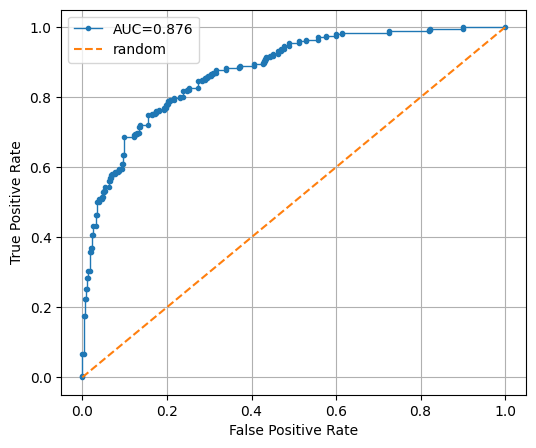

In [25]:
y_proba = pipe.predict_proba(X_test)[:, 1]

fpr, tpr, thr = roc_curve(y_test, y_proba)
roc_auc_v = auc_metric(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, marker="o", markersize=3, linewidth=1, label=f"AUC={roc_auc_v:.3f}")  # точки + линия
plt.plot([0, 1], [0, 1], "--", label="random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.legend()
plt.savefig("figures/roc_logreg_points.png", dpi=150, bbox_inches="tight")
plt.show()

In [29]:
acc_dummy = accuracy_score(y_test, dummy.predict(X_test))
acc_lr = accuracy_score(y_test, pipe.predict(X_test))
auc_lr = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])

auc_dummy = roc_auc_score(y_test, dummy.predict_proba(X_test)[:, 1])
results = pd.DataFrame([
    {"model": "DummyClassifier(most_frequent)", "accuracy": acc_dummy, "roc_auc": auc_dummy},
    {"model": f"LogReg+Scaler(C={best_C:g})", "accuracy": acc_lr, "roc_auc": auc_lr},
])

results["accuracy_delta"] = results["accuracy"] - results.loc[0, "accuracy"]
results["roc_auc_delta"]  = results["roc_auc"]  - results.loc[0, "roc_auc"]

display(results)

# если нужно сохранить в файл:
results.to_csv("hw05_results_table.csv", index=False)


,model,accuracy,roc_auc,accuracy_delta,roc_auc_delta
0,DummyClassifier(most_frequent),0.59,0.500000,0.00,0.000000
1,LogReg+Scaler(C=10),0.80,0.875637,0.21,0.375637


- Бейзлайн DummyClassifier(most_frequent) игнорирует признаки и предсказывает всем класс 0, поэтому даёт лишь accuracy=0.59 и ROC-AUC=0.50 (уровень случайного ранжирования).
- Логистическая регрессия со StandardScaler заметно лучше: accuracy≈0.80, ROC-AUC≈0.8756, прирост относительно бейзлайна +0.21 по accuracy и +0.3756 по ROC-AUC.
- При переборе C качество почти не менялось (ROC-AUC около 0.8754–0.8756), поэтому модель стабильна к выбору регуляризации в этой сетке.